# Exploratory Data Analysis (EDA) for Big Data: 4V Framework

This notebook performs exploratory data analysis (EDA) using the 4V characteristics of Big Data: **Volume**, **Velocity**, **Variety**, and **Veracity**.

## Student Id: **24136959**

## Overview
This notebook provides a comprehensive initial exploration of the retail customer dataset using the 4V framework, a foundational approach for understanding big data characteristics and quality.

## Intent
The analysis aims to:
1. **Volume**: Assess dataset scale (rows, columns, memory footprint) and understand the distribution of numeric features
2. **Velocity**: Analyze temporal patterns and data generation rates over time using datetime columns
3. **Variety**: Explore data type diversity, categorical distributions, and structural heterogeneity across the dataset
4. **Veracity**: Evaluate data quality through missing value analysis, outlier detection, and correlation patterns to identify potential data inconsistencies

## Key Libraries Used
- **pandas**: Core data manipulation, loading CSV files, aggregation, and data type inference
- **matplotlib**: Static plotting and visualization figure management
- **seaborn**: Statistical visualization with enhanced styling (histograms, heatmaps, bar plots)
- **numpy**: Numerical operations and selection of numeric columns for analysis

## Workflow
1. Load and inspect dataset structure and initial statistics
2. Volume Analysis: Memory usage and numeric feature distributions
3. Velocity Analysis: Temporal trends and time-series patterns
4. Variety Analysis: Data type diversity and categorical value distributions
5. Veracity Analysis: Missing values, outliers via IQR method, and correlation relationships

## Output
Summary statistics, visualizations of feature distributions, temporal patterns, quality metrics, and outlier insights to inform subsequent preprocessing and modeling steps.

## Setup and Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Set visualisation style
sns.set(style='whitegrid')

## Load the dataset & display first few rows

This sections reads and loads the dataset *data.csv* (retail customer data 20000 4539.csv renamed to data.csv)

In [2]:
# Load the dataset
data_path = '../data/raw/data.csv'  # retail customer data 20000 4539.csv renamed to data.csv
df = pd.read_csv(data_path)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

# Check if the file was loaded correctly
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")
# Display the first few rows of the dataset
df.head()

Dataset loaded with 20000 rows and 13 columns.


,Customer_ID,Name,Email,Gender,Age,City,Country,Date_of_Purchase,Product_Category,Purchase_Amount,Payment_Method,Loyalty_Member,Satisfaction_Score
0,0e1e5ebd-ff99-4e31-9006-e0eb63a84422,Richard Bryant,heatherweber@gmail.com,Female,54,West Jasmineport,Zimbabwe,24/09/2023,Beauty,807.85,Credit Card,Yes,2
1,c3649c91-faca-40d4-956e-09491de58d73,Jeffrey Stevens,charleschristian@smith.org,Other,52,Cheyennestad,Gabon,05/07/2023,Sports,433.16,Bank Transfer,Yes,5
2,1336eb28-33ba-4e1b-80ff-8beb631eb726,Robert Sanchez,karenwalsh@gmail.com,Male,40,Williamsonfort,Cook Islands,28/04/2024,Electronics,122.26,Credit Card,No,5
3,d076ddad-317e-43a4-ab16-b1fd14ca728c,Taylor Mullins,lisa34@cruz.info,Male,23,Mariaport,Bhutan,28/09/2023,Electronics,439.39,PayPal,Yes,4
4,f830aa05-d2d4-4d05-95b8-23649ca4d06c,Andrew Owens,lynn63@hotmail.com,Other,21,North Pamelaton,Svalbard & Jan Mayen Islands,20/07/2023,Books,462.73,Credit Card,No,3


## Basic Dataset Overview

This section provides a high-level overview of the dataset: dimensions, column types, basic statistics, and missing values.

In [3]:
# Get basic information about the dataset
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         20000 non-null  object 
 1   Name                20000 non-null  object 
 2   Email               20000 non-null  object 
 3   Gender              20000 non-null  object 
 4   Age                 20000 non-null  int64  
 5   City                20000 non-null  object 
 6   Country             20000 non-null  object 
 7   Date_of_Purchase    20000 non-null  object 
 8   Product_Category    20000 non-null  object 
 9   Purchase_Amount     20000 non-null  float64
 10  Payment_Method      20000 non-null  object 
 11  Loyalty_Member      20000 non-null  object 
 12  Satisfaction_Score  20000 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 2.0+ MB


,Customer_ID,Name,Email,Gender,Age,City,Country,Date_of_Purchase,Product_Category,Purchase_Amount,Payment_Method,Loyalty_Member,Satisfaction_Score
count,20000,20000,20000,20000,20000.000000,20000,20000,20000,20000,20000.000000,20000,20000,20000.000000
unique,20000,17865,19799,3,NaN,13364,243,731,6,NaN,4,2,NaN
top,0e1e5ebd-ff99-4e31-9006-e0eb63a84422,Michael Jones,rbrown@hotmail.com,Other,NaN,New Jennifer,Congo,19/03/2025,Sports,NaN,Bank Transfer,Yes,NaN
freq,1,11,4,6716,NaN,20,185,44,3385,NaN,5114,10075,NaN
mean,NaN,NaN,NaN,NaN,43.457500,NaN,NaN,NaN,NaN,506.766263,NaN,NaN,3.002750
std,NaN,NaN,NaN,NaN,15.005641,NaN,NaN,NaN,NaN,284.561377,NaN,NaN,1.416101
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,10.010000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,261.392500,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,509.290000,NaN,NaN,3.000000
75%,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,749.447500,NaN,NaN,4.000000


## 1. Volume Analysis

Volume describes **how much** data is present (rows, columns, memory footprint) and basic distribution characteristics.

Rows: 20,000, Columns: 13
Approx. memory usage: 12.25 MB
Numeric columns: 3


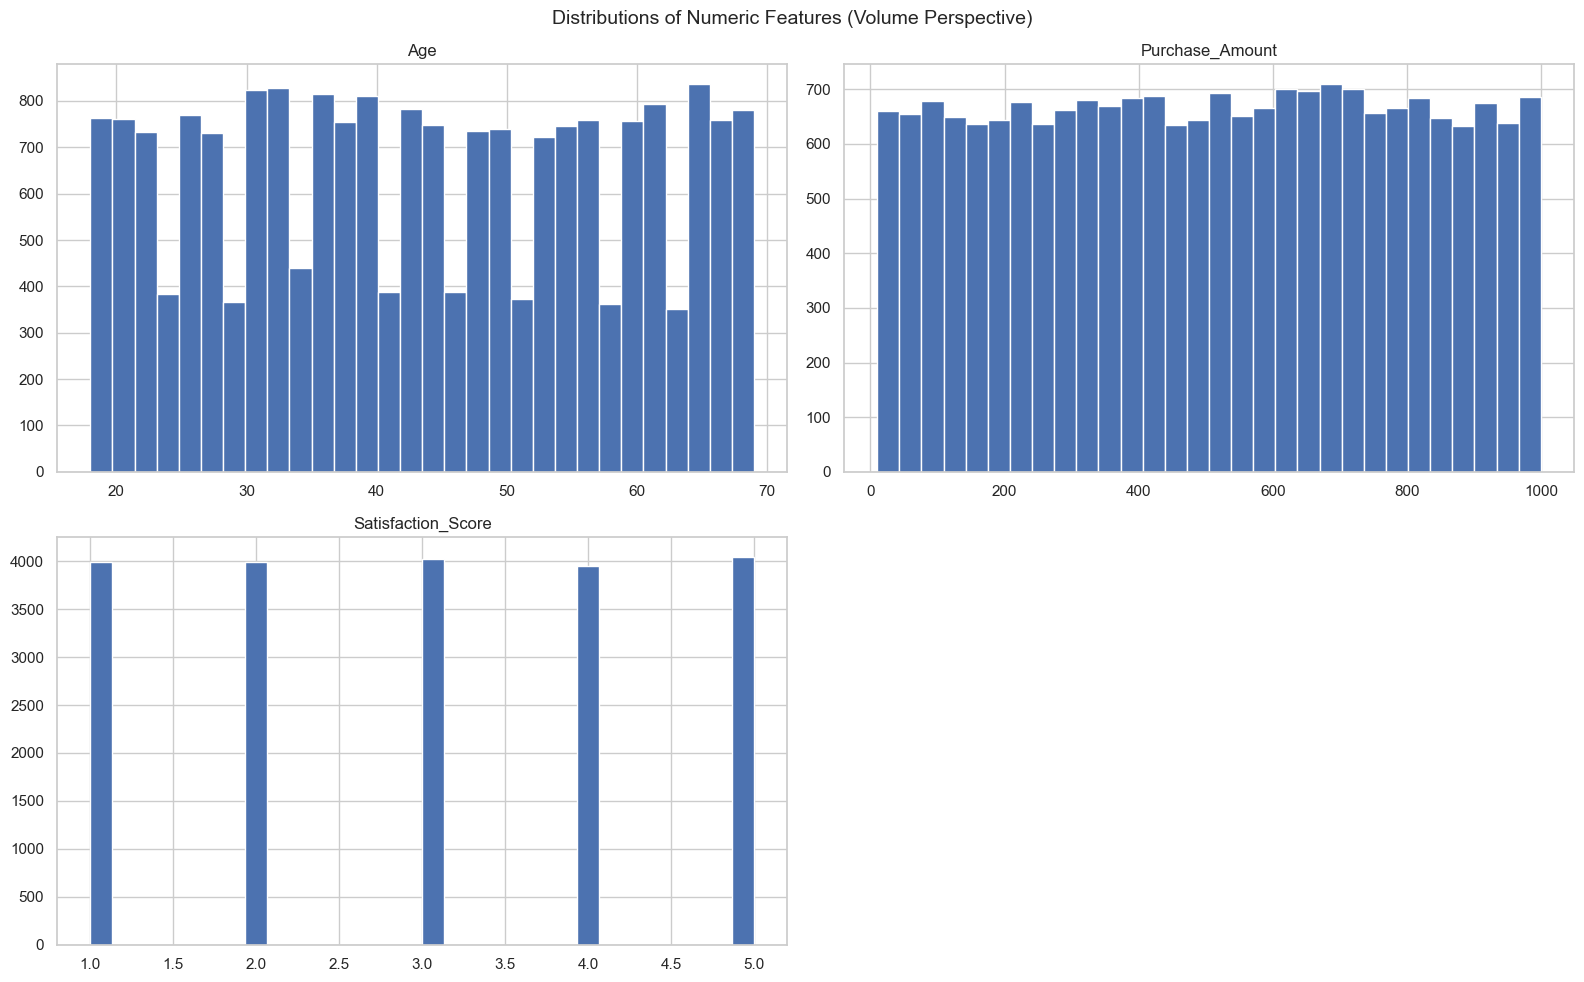

In [4]:
# Number of rows and columns
n_rows, n_cols = df.shape
print(f'Rows: {n_rows:,}, Columns: {n_cols}')

# Approximate memory usage
df_memory = df.memory_usage(deep=True).sum() / (1024**2)
print(f'Approx. memory usage: {df_memory:.2f} MB')

# Distribution of numeric features (histograms)
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_numeric = len(numeric_cols)
print(f'Numeric columns: {n_numeric}')

if n_numeric > 0:
    df[numeric_cols].hist(figsize=(16, 10), bins=30)
    plt.suptitle('Distributions of Numeric Features (Volume Perspective)', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print('No numeric columns to visualize.')

## 2. Velocity Analysis

Velocity refers to how fast data is generated or changes over time. Here, we look for time-related columns and basic temporal patterns.

Detected datetime columns: ['Date_of_Purchase']


/var/folders/x2/mzhv761x32vgtt48d0v3p3p40000gn/T/ipykernel_46682/3660693517.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='raise')


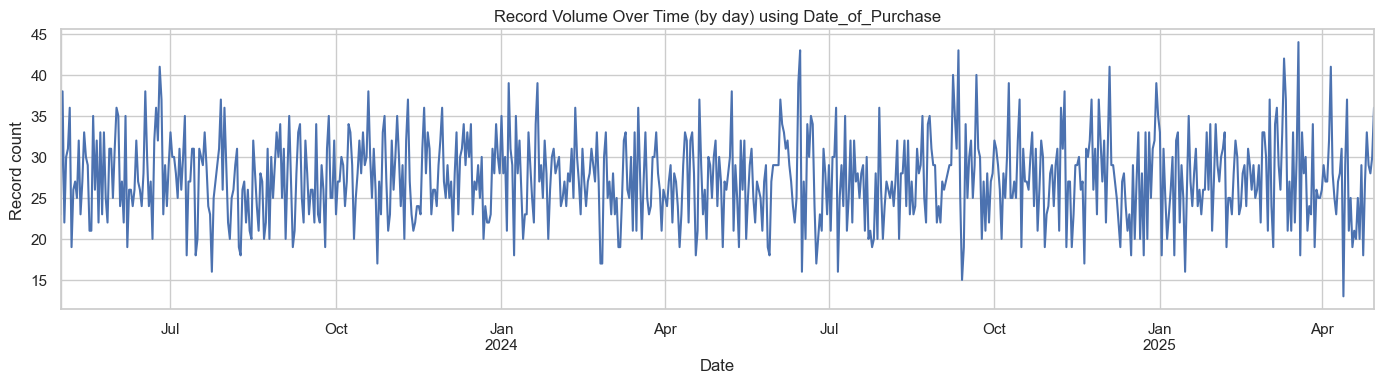

In [5]:
# Attempt to infer datetime columns
datetime_cols = []
for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower() or 'timestamp' in col.lower():
        try:
            df[col] = pd.to_datetime(df[col], errors='raise')
            datetime_cols.append(col)
        except Exception:
            pass

print('Detected datetime columns:', datetime_cols)

if datetime_cols:
    # Use the first datetime column as an index for temporal aggregation
    time_col = datetime_cols[0]
    df_sorted = df.sort_values(time_col).copy()

    # Plot record counts over time (by day)
    counts_by_day = df_sorted.set_index(time_col).resample('D').size()
    plt.figure(figsize=(14, 4))
    counts_by_day.plot()
    plt.title(f'Record Volume Over Time (by day) using {time_col}')
    plt.xlabel('Date')
    plt.ylabel('Record count')
    plt.tight_layout()
    plt.show()
else:
    print('No clear datetime columns detected for velocity analysis. Consider specifying one manually.')

## 3. Variety Analysis

Variety captures the different **types** and structures of data (numeric, categorical, text, etc.) and the diversity of values within them.

Data types count:
object            9
int64             2
datetime64[ns]    1
float64           1
Name: count, dtype: int64
Categorical/text columns (9): ['Customer_ID', 'Name', 'Email', 'Gender', 'City', 'Country', 'Product_Category', 'Payment_Method', 'Loyalty_Member']
Unique values per categorical column:
Customer_ID         20000
Email               19799
Name                17865
City                13364
Country               243
Product_Category        6
Payment_Method          4
Gender                  3
Loyalty_Member          2
dtype: int64


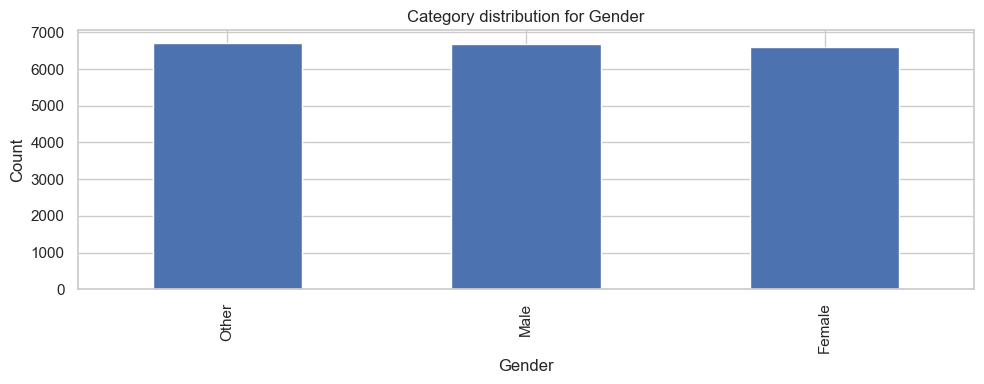

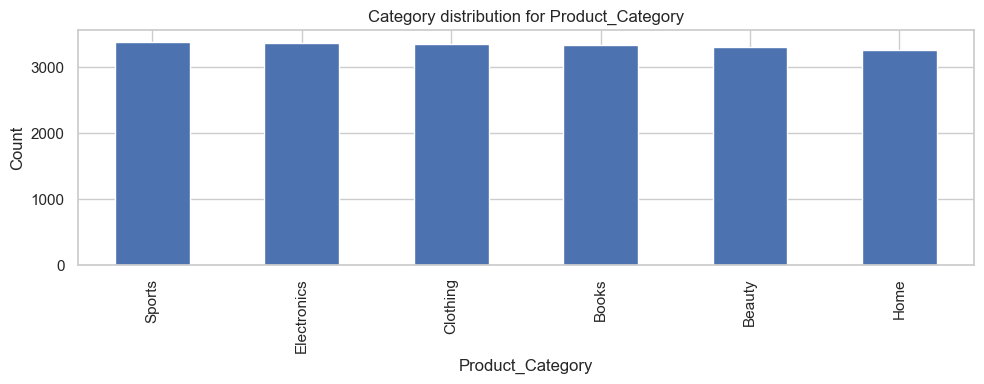

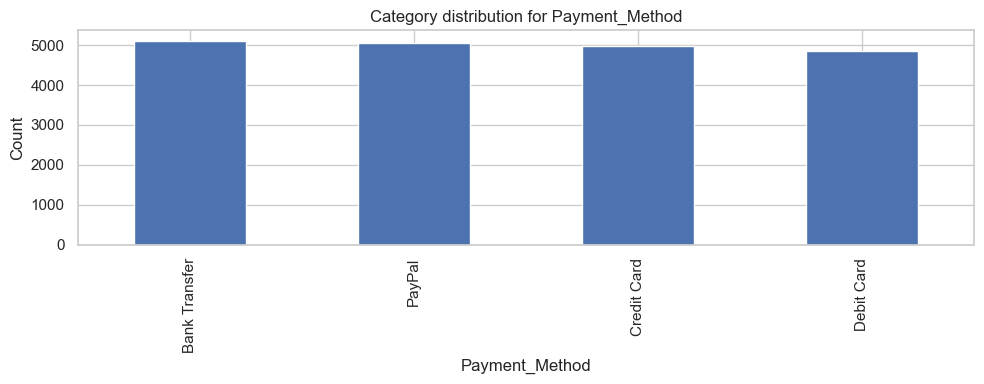

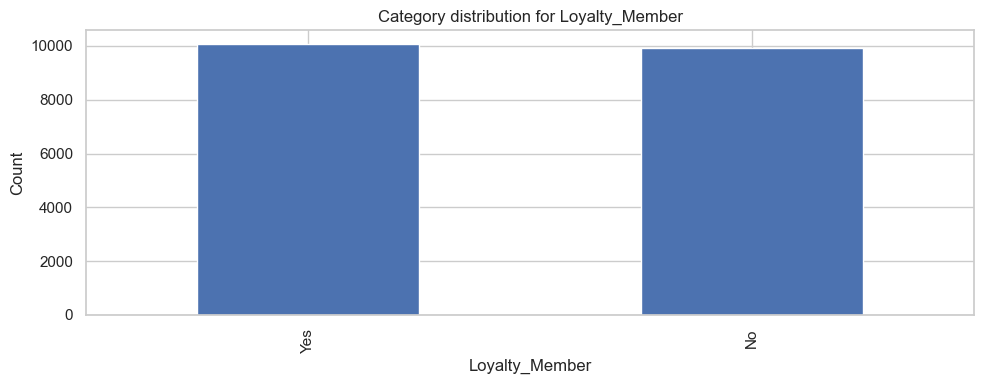

In [6]:
# Overview of data types
dtype_counts = df.dtypes.value_counts()
print('Data types count:')
print(dtype_counts)

# Categorical / object columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(f'Categorical/text columns ({len(cat_cols)}):', list(cat_cols))

# Unique value counts for categorical columns
cat_unique = df[cat_cols].nunique().sort_values(ascending=False) if len(cat_cols) > 0 else pd.Series(dtype=int)
print('Unique values per categorical column:')
print(cat_unique)

# Visualize top categories for a few low-cardinality columns
low_card_cols = [c for c in cat_cols if df[c].nunique() <= 20]
for c in low_card_cols[:5]:
    plt.figure(figsize=(10, 4))
    df[c].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Category distribution for {c}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## 4. Veracity Analysis

Veracity relates to data **quality**, including missing values, outliers, inconsistencies, and potential errors.

In [7]:
# Missing data pattern
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_ratio = missing_counts / len(df)
missing_summary = pd.DataFrame({'missing_count': missing_counts, 'missing_ratio': missing_ratio})
missing_summary[missing_summary['missing_count'] > 0]

,missing_count,missing_ratio


In [8]:
# Outlier detection using IQR for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_stats = []
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_stats.append({'column': col, 'outliers': outliers, 'ratio': outliers / len(df)})

outlier_df = pd.DataFrame(outlier_stats).sort_values('ratio', ascending=False)
outlier_df.head(10)

,column,outliers,ratio
0,Age,0,0.0
1,Purchase_Amount,0,0.0
2,Satisfaction_Score,0,0.0


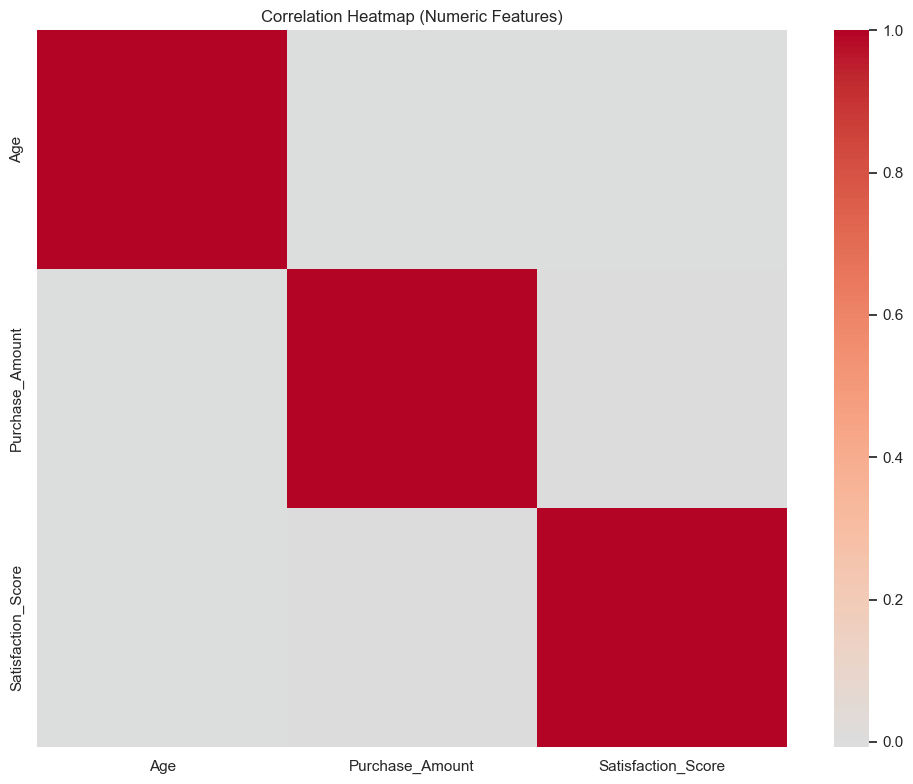

In [9]:
# Correlation matrix for numeric columns (to spot suspicious relationships)
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap (Numeric Features)')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

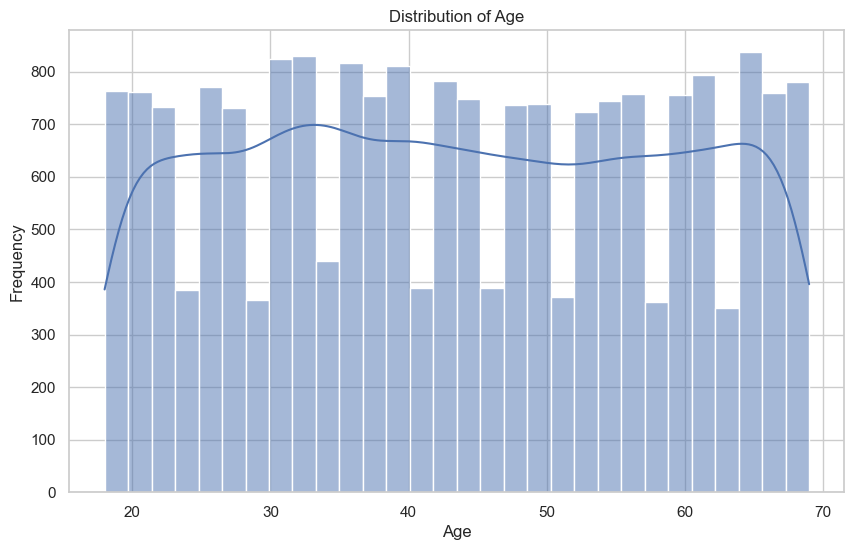

In [10]:

# Visualize the distribution of a Age column
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

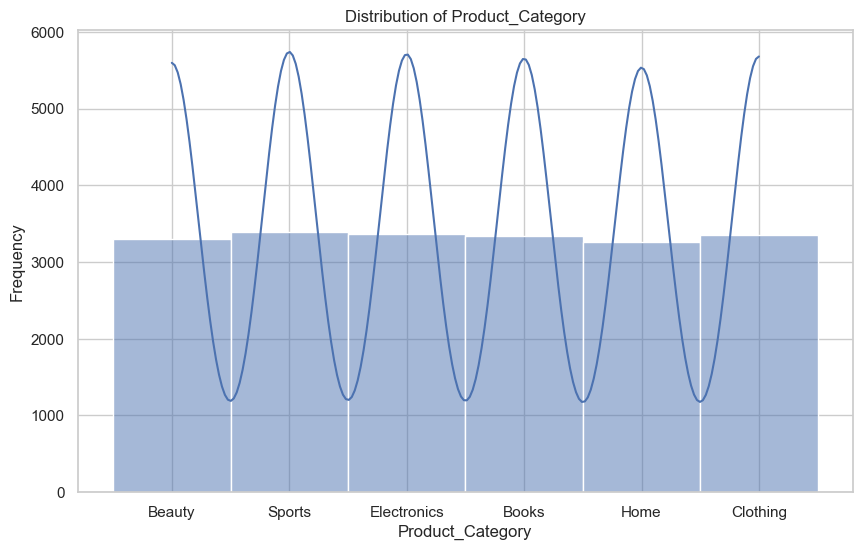

In [11]:
# Visualize the distribution of a Country column
plt.figure(figsize=(10, 6))
sns.histplot(df['Product_Category'], bins=30, kde=True)
plt.title('Distribution of Product_Category')
plt.xlabel('Product_Category')
plt.ylabel('Frequency')
plt.show()

## Conclusion

In this notebook, we have performed initial exploratory data analysis on the dataset. We have loaded the data, inspected its structure, and visualized key features. Further analysis and preprocessing will be conducted in the next notebook.